Pontificia Universidad Católica de Chile <br>
Departamento de Ciencia de la Computación <br>
IIC2433 - Minería de Datos
<br>

<center>
    <h2> Tarea 1 </h2>
    <h1> Mobile Price </h1>
    <p>
        Profesor Marcelo Mendoza<br>
        Segundo Semestre 2023<br>    
        Fecha de entrega: 4 de septiembre
    </p>
    <br>
</center>

<br>

---

## Indicaciones

Deberás entregar **SOLO** el archivo .ipynb en el buzón respectivo en canvas.

**IMPORTANTE**:
- Se te dará puntaje tanto por código como por la manera en la que respondas las preguntas planteadas. Es decir, si tienes un código perfecto pero este no es explicado o no se responden preguntas asociadas a este, no se tendrá el puntaje completo.
- El notebook debe tener todas las celdas de código ejecutadas. Cualquier notebook que no las tenga no podrá ser corregido.
- El carácter de esta tarea es **INDIVIDUAL**. Cualquier instancia de copia resultará en un 1,1 como nota de curso.

---

## Librerías

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Importa aquí las librerías que vayas a utilizar




##Introducción

El dataset utilizado es Mobile Price. Este conjunto de datos refleja una serie de características propias de un teléfono móvil.

A continuación, se presentan las variables que están contenidas:

* battery_power: Capacidad de la batería.

* blue: Tiene bluetooth o no.

* clock_speed: Frecuencia del procesador.

* dual_sim: Tiene dual sim o no.

* fc: Megapixeles de la cámara frontal.

* four_g: Tiene 4G o no.

* int_memory: Memoria interna.

* m_dep: Profundidad del teléfono.

* mobile_wt: Peso del teléfono.

* n_cores: Número de procesadores.

* pc: Megapixeles de la cámara trasera.

* px_height: Cantidad de pixeles (alto)

* px_width: Cantidad de pixeles (ancho)

* ram: Memoria RAM

* sc_h: Altura de la pantalla.

* sc_w: Ancho de la pantalla.

* talk_time: Duración de la batería.

* three_g: Tiene 3G o no.

* touch_screen: Tiene pantalla táctil o no.

* wifi: Tiene WIFI o no.

* price_range: Rango de precios (0: low cost, 1: medium cost, 2: high cost y 3: very high cost)




## Parte 1: Carga y Preprocesamiento de Datos (20 puntos)

En esta primera parte se debe cargar el dataset y luego describir el comportamiento de algunas variables de interés. Posteriormente, debe realizar el proceso de normalización de los datos.

### 1.1 Carga de Datos (3 puntos)

Cargue el dataset Mobile Price dataset. Indique la cantidad de filas y columnas del conjunto de datos. ¿Existen datos nulos?

RESPUESTA:

In [2]:
data = pd.read_csv("Mobile Price dataset.csv")
n_rows, n_cols = data.shape
print("El dataset tiene", n_rows, "filas y", n_cols, "columnas")
# Existen datos nulos en el dataset?
print("Existen datos nulos en el dataset?", data.isnull().values.any())

El dataset tiene 2000 filas y 21 columnas
Existen datos nulos en el dataset? False


### 1.2 Describir dataset (9 puntos)

Mediante gráficos y medidas descriptivas apropiadas, describa el comportamiento de las variables:

* battery_power
* ram
* fc
* price_range

Luego, use gráficos y medidas descriptivas para reflejar la relación existente entre cada variable cuantitativa y el nivel de precios (price_range). Comente.

RESPUESTA:

### Overview

In [3]:
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


### Battery Power vs Price Range

c:\Users\Gabi\Documents\U-2023-2\IIC2433\tareas\.tareas\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Gabi\Documents\U-2023-2\IIC2433\tareas\.tareas\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Gabi\Documents\U-2023-2\IIC2433\tareas\.tareas\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Gabi\Documents\U-2023-2\IIC2433\tareas\.tareas\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is 

<Axes: xlabel='price_range', ylabel='battery_power'>

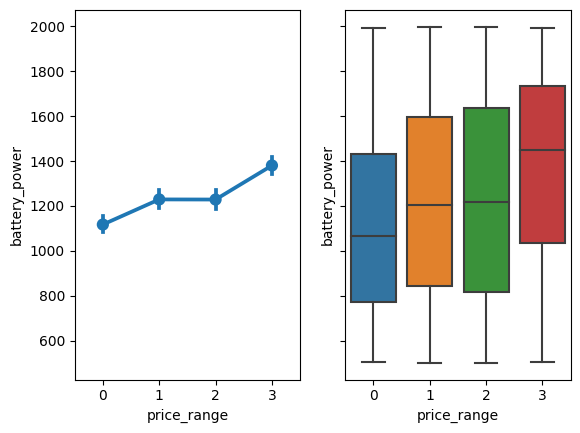

In [9]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)

sns.pointplot(x='price_range',y='battery_power',data=data, ax=ax1)
sns.boxplot(x='price_range',y='battery_power',data=data, ax=ax2)

### RAM vs Price Range

c:\Users\Gabi\Documents\U-2023-2\IIC2433\tareas\.tareas\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Gabi\Documents\U-2023-2\IIC2433\tareas\.tareas\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Gabi\Documents\U-2023-2\IIC2433\tareas\.tareas\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Gabi\Documents\U-2023-2\IIC2433\tareas\.tareas\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is 

<Axes: xlabel='price_range', ylabel='ram'>

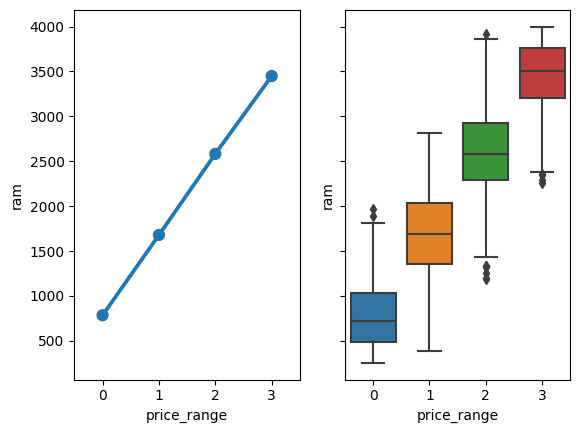

In [10]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)

sns.pointplot(x='price_range',y='ram',data=data, ax=ax1)
sns.boxplot(x='price_range',y='ram',data=data, ax=ax2)

### FC vs Price Range

c:\Users\Gabi\Documents\U-2023-2\IIC2433\tareas\.tareas\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Gabi\Documents\U-2023-2\IIC2433\tareas\.tareas\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Gabi\Documents\U-2023-2\IIC2433\tareas\.tareas\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Gabi\Documents\U-2023-2\IIC2433\tareas\.tareas\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is 

<Axes: xlabel='price_range', ylabel='fc'>

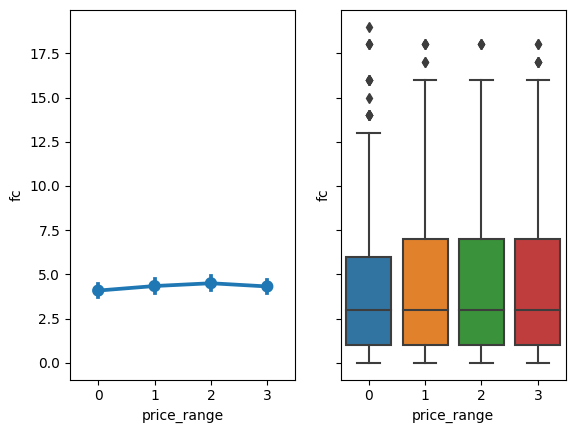

In [11]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)

sns.pointplot(x='price_range',y='fc',data=data, ax=ax1)
sns.boxplot(x='price_range',y='fc',data=data, ax=ax2)

### Price Range

c:\Users\Gabi\Documents\U-2023-2\IIC2433\tareas\.tareas\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Gabi\Documents\U-2023-2\IIC2433\tareas\.tareas\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price_range', ylabel='Count'>

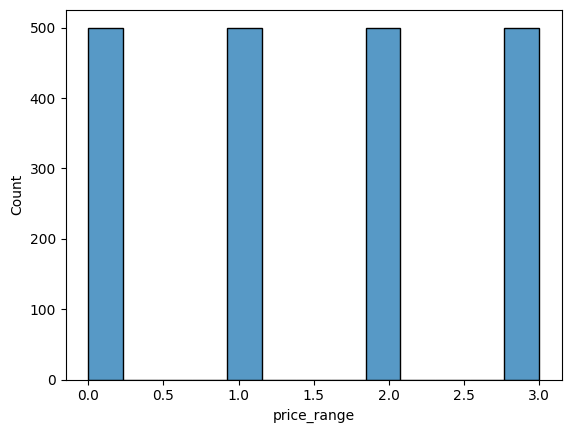

In [13]:
sns.histplot(data=data, x="price_range")

### 1.3 Normalizar datos (8 puntos)

Realice un proceso de normalización, considerando **SOLO** las siguientes variables:

* 'battery_power',
* 'clock_speed',
* 'fc',
* 'int_memory',
* 'm_dep',
* 'mobile_wt',
* 'n_cores',
* 'pc',
* 'px_height',
* 'px_width',
* 'ram',
* 'sc_h',
* 'sc_w',
* 'talk_time'


Explique por qué es útil realizar esta acción.

RESPUESTA:

In [14]:
to_norm = ['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']

In [17]:
from sklearn import preprocessing

norm_data = data.copy()
min_max_scaler = preprocessing.MinMaxScaler()
#normalize only to_norm columns
for col in to_norm:
    norm_data[col] = min_max_scaler.fit_transform(norm_data[col].values.reshape(-1,1))

In [18]:
norm_data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,0.227789,0,0.68,0,0.052632,0,0.080645,0.555556,0.900000,0.142857,...,0.010204,0.170895,0.612774,0.285714,0.388889,0.944444,0,0,1,1
1,0.347361,1,0.00,1,0.000000,1,0.822581,0.666667,0.466667,0.285714,...,0.461735,0.993324,0.634687,0.857143,0.166667,0.277778,1,1,0,2
2,0.041416,1,0.00,1,0.105263,1,0.629032,0.888889,0.541667,0.571429,...,0.644388,0.811749,0.627205,0.428571,0.111111,0.388889,1,1,0,2
3,0.076152,1,0.80,0,0.000000,0,0.129032,0.777778,0.425000,0.714286,...,0.620408,0.858478,0.671566,0.785714,0.444444,0.500000,1,0,0,2
4,0.881764,1,0.28,0,0.684211,1,0.677419,0.555556,0.508333,0.142857,...,0.616327,0.475300,0.308658,0.214286,0.111111,0.722222,1,1,0,1


In [21]:
X = norm_data.drop(['price_range'], axis=1)
y = norm_data['price_range']

Es util realizar esta acción ya que los datos se encuentran en distintas escalas, por lo que es necesario normalizarlos para que todos se encuentren en la misma escala y así poder compararlos.

### Bonus: Investigar medida de asociación lineal (3 décimas)

Investigue una medida de asociación lineal entre variables cuantitativas. Describa sus principales características, poniendo énfasis en la interpretación de sus resultados. Luego, calcule la medida respectiva para los datos cuantitativos ya normalizados en el punto 1.3. ¿Qué variables tienen la mayor relación?

RESPUESTA:

<Axes: >

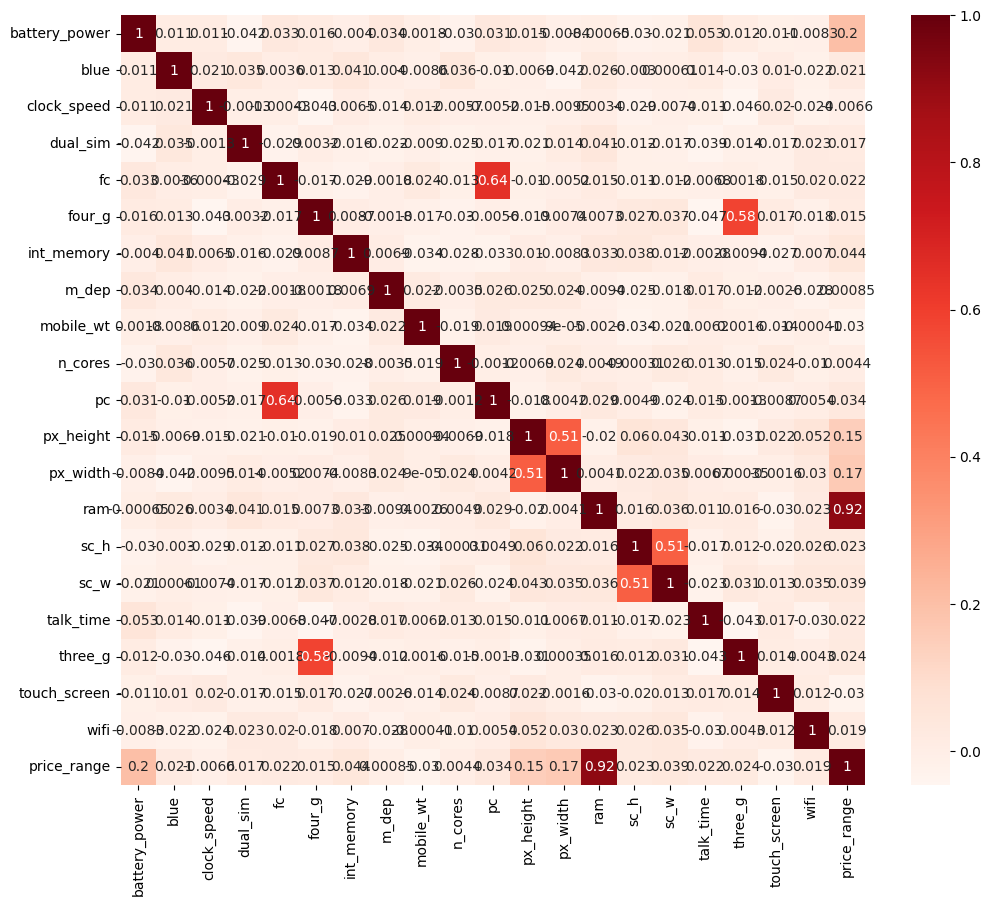

In [20]:
# medida de asociación lineal entre variables cuantitativas:
# coeficiente de correlación de Pearson usando sns.heatmap
plt.figure(figsize=(12,10))
corr = norm_data.corr(method='pearson')
sns.heatmap(corr, annot=True, cmap=plt.cm.Reds)

Utilizando el metodo de correlación lineal de pearson, se puede notar que las variables mayormente linealmente correlacionadas son ram y price_range, mientras que el resto de variables en general estan bajamente correlacionadas.

## Parte 2: Reducción de dimensionalidad (15 puntos)

En esta segunda sección se debe utilizar el resultado 1.3 de la parte 1. Para reducir la dimensionalidad, se debe trabajar con **Principal Component Analysis (PCA)**.

### 2.1 Comportamiento de la varianza (5 puntos)

Grafique el comportamiento de la varianza en función del número de componentes. Comente.

RESPUESTA:

In [29]:
from sklearn.decomposition import PCA

pca = PCA(n_components=20)
pca.fit(X)

PCA(n_components=20)

In [30]:
def plot_var_curve(X):
    plt.plot(X, lw=4)
    plt.grid(axis='y')
    plt.xlabel('Components')
    plt.ylabel('Variance')
    plt.title('Explained variance')

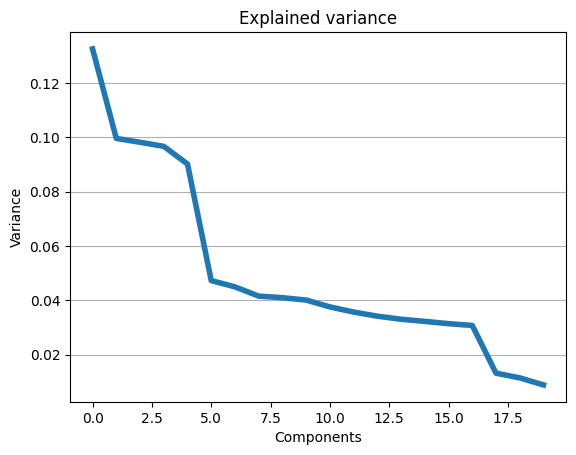

In [31]:
plot_var_curve(pca.explained_variance_ratio_)

### 2.2 Retener 90% de la varianza (5 puntos)

PCA debe retener un 90% de la varianza de los datos originales. ¿Cuál es el número de componentes que se requieren?

RESPUESTA:

In [24]:
def min_var(v,exp_var):
    acc = 0
    i=0
    while acc < v:
        acc += exp_var[i]
        i += 1
    return i


## Calculamos las compoenntes para retener el 90% de la varianza del dataset original
min_var(0.9, pca.explained_variance_ratio_)

15

In [25]:
pca = PCA(n_components=15)
pca.fit(X)

PCA(n_components=15)

### 2.3 Reducir dimensionalidad a n=6 (5 puntos)

PCA debe construirse con dimensionalidad n=6. Determine la proporción de varianza explicada.

RESPUESTA:

In [26]:
pca_6 = PCA(n_components=6)
pca_6.fit(X)

PCA(n_components=6)

## Parte 3: Detección de outliers (10 puntos)

En esta tercera parte se debe evaluar la existencia de outliers en el conjunto de datos que solo contiene variables cuantitativas. Para ello, debe trabajar con la matriz obtenida en el punto 2.2 (retiene el 90% de la varianza).

### 3.1 Graficar histograma LOF (5 puntos)

Utilizando la técnica **Local Outlier Factor (LOF)**, construya un histograma de puntajes LOF. Considere un número de vecinos igual a 5 y use como métrica la distancia euclidiana.

RESPUESTA:

### 3.2 Identificar datos atípicos (5 puntos)

En base al histograma del punto 3.1, y considerando un umbral de corte igual a -1,15, determine los datos atípicos del dataset. ¿Qué proporción de datos corresponden a outliers?

Luego, elimine los datos atípicos del conjunto de datos evaluado.

RESPUESTA:

## Parte 4: Clasificación (15 puntos)

En esta última sección debe entrenar un clasificador basado en k-nearest neighbors. Para ello, debe considerar el resultado del punto 3.2. Es decir, el conjunto de datos que no contiene datos atípicos.

### 4.1 Separar train y test (4 puntos)

Tomando en consideración el resultado del punto 3.2, separe el conjunto de datos en train (75%) y test (25%). Utilice **price_range** como variable de respuesta (y).

Luego, para y_train e y_test, determine la cantidad de elementos de cada clase.

**Observación:**

Para trabajar con la variable **price_range**, debe eliminar los registros clasificados como atípicos en el dataset original de Mobile Price. Considere que la dimensión del vector **price_range** debe coincidir con el número de filas del conjunto de datos del punto 3.2.

RESPUESTA:

### 4.2 Aplicar clasificador KNeighborsClassifier (7 puntos)

Determine el número de vecinos entre los siguientes valores: 2, 3, 4, 5, 6 y 7. Considere la métrica score para tomar la decisión.

RESPUESTA:

### 4.3 Evaluar clasificador por clase (4 puntos)

Utilizando el mejor clasificador, identificado en el punto 4.2, evalúe el rendimiento por clase.

RESPUESTA: